In [ ]:
#Importing necessary Python Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
from google.colab import drive
import chardet

import warnings
warnings.filterwarnings('ignore')

#Mounting the drive and getting the sms dataset
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/spam.csv'

with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())
encoding = result['encoding']

sdf1 = pd.read_csv(file_path, encoding=encoding)

#Mounting the drive and getting the email dataset
file_path2 = '/content/drive/My Drive/spam_ham_dataset.csv'

with open(file_path2, 'rb') as f1:
    result = chardet.detect(f1.read())

encoding = result['encoding'] if result['encoding'] is not None else 'latin1'

sdf2 = pd.read_csv(file_path2, encoding=encoding)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Checking the sms dataset
sdf1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#Checking the shape of the sms dataset
sdf1.shape

(5572, 5)

In [ ]:
#Checking the email dataset
sdf2.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
#Checking the shape of the email dataset
sdf2.shape

(5171, 4)

In [ ]:
#Now we are preparing to combine the datasets
#First we are renaming the sms dataset to easily combine with the email dataset
sdf1 = sdf1[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'text'})
sdf2 = sdf2[['label', 'text']]

In [ ]:
#checking the renamed sms dataset
sdf1.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Checking the email dataset
sdf2.head(5)

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [ ]:
#Combining the datasets
sdf = pd.concat([sdf1, sdf2], ignore_index=True)

In [ ]:
#Checking the combined dataset
sdf.sample(5)

,label,text
319,ham,"Coffee cake, i guess..."
9310,ham,Subject: re : cp & l\r\ni do not have a record...
2483,ham,Mm have some kanji dont eat anything heavy ok
9096,ham,Subject: re : noms / actual flow for 03 / 05\r...
5668,ham,Subject: updated list\r\nvalero deals have now...


In [ ]:
#Labeling the data as 0 and 1 instead of their original labels
sdf['label'] = sdf['label'].apply(lambda x: 1 if x == 'spam' else 0)

In [ ]:
#Cheking our work
sdf.sample(5)

,label,text
9452,0,Subject: natural gas nomination for december 2...
8393,0,Subject: re : lst rev mar . 2000 josey ranch n...
10031,0,Subject: re : midcon invoices\r\ndo you guys a...
2130,0,Later i guess. I needa do mcat study too.
8593,0,"Subject: hpl nom for february 8 , 2001\r\n( se..."


In [ ]:
#Checking for null values
sdf.isnull().sum()

,0
label,0
text,0


In [ ]:
#Droping columns with missing values
sdf = sdf.dropna()
print(sdf.isna().sum())

label    0
text     0
dtype: int64


In [ ]:
#Checking for duplicate entries
sdf.duplicated().sum()

581

In [ ]:
#Dropping duplicate entries
sdf = sdf.drop_duplicates(keep='first')
sdf.duplicated().sum()

0

In [ ]:
#Checking the shape of our data
sdf.shape

(10162, 2)

In [ ]:
#Getting info about our data
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10162 entries, 0 to 10742
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10162 non-null  int64 
 1   text    10162 non-null  object
dtypes: int64(1), object(1)
memory usage: 238.2+ KB


In [ ]:
#Checking the number of entries for each label
sms_type_counts = sdf['label'].value_counts()

In [ ]:
print(sms_type_counts)

label
0    8047
1    2115
Name: count, dtype: int64


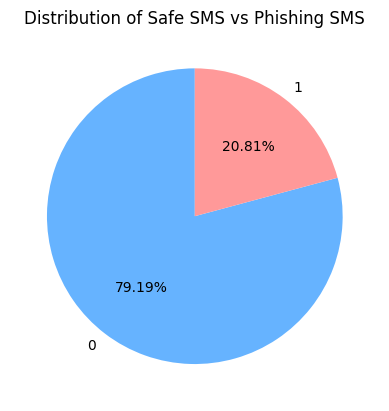

In [ ]:
#Plotting them as a pie chart
plt.pie(sms_type_counts, labels=sms_type_counts.index, autopct='%0.2f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Safe SMS vs Phishing SMS')
plt.show()

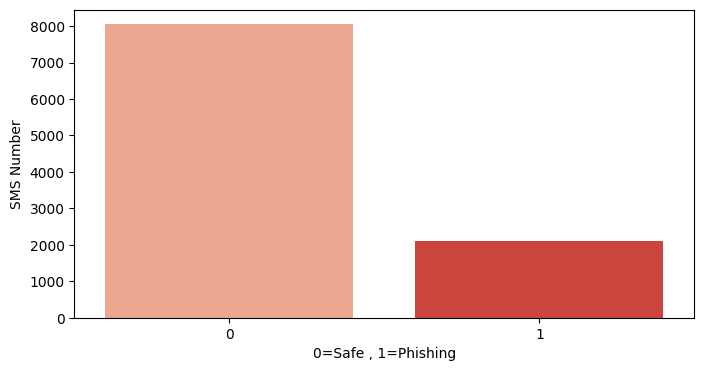

In [ ]:
#Plotting it as a bar graph
plt.figure(figsize=(8,4))
sns.countplot(data=sdf, x='label', palette='Reds')
plt.xlabel("0=Safe , 1=Phishing")
plt.ylabel("SMS Number")
plt.show()

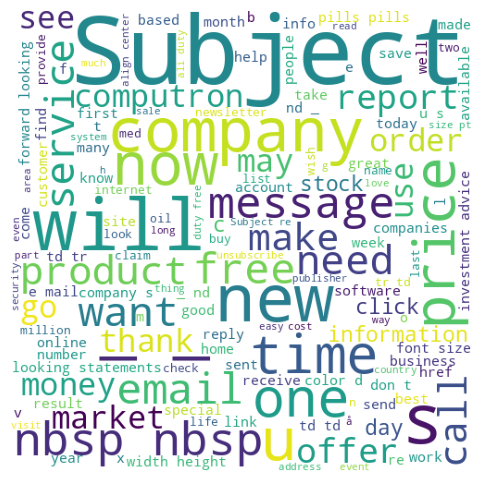

In [ ]:
#Generating a word cloud
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
phishing_worldcloud = wc.generate(" ".join(sdf[sdf['label'] == 1]['text']))

plt.figure(figsize=(15, 6))
plt.imshow(phishing_worldcloud)
plt.axis('off')
plt.show()

In [ ]:
#Here we are creating a function to clean the data
import string
import nltk
from nltk.stem import PorterStemmer
import re
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')


ps = PorterStemmer()

def cleaned_data(text):
    text = text.lower()

    text = re.sub('[^a-zA-Z0-9]', ' ', text)

    text = re.sub(r'http\S+', '', text)
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Testing the cleaning function
cleaned_data("Hello! Visit https://example.com for 50% OFF on your purchase!!! Don't miss out. Call us NOW at 123-456-7890 or email at sales@example.com.")

'hello visit exampl com 50 purchas miss call us 123 456 7890 email sale exampl com'

In [ ]:
#Cleaning the entire data
def cleaned_data_with_counter(row, counter=[0]):
    counter[0] += 1
    if counter[0] % 500 == 0:
        print(f"Processed {counter[0]} rows")
    return cleaned_data(row['text'])

sdf['cleaned_text'] = sdf.apply(cleaned_data_with_counter, axis=1)

Processed 500 rows
Processed 1000 rows
Processed 1500 rows
Processed 2000 rows
Processed 2500 rows
Processed 3000 rows
Processed 3500 rows
Processed 4000 rows
Processed 4500 rows
Processed 5000 rows
Processed 5500 rows
Processed 6000 rows
Processed 6500 rows
Processed 7000 rows
Processed 7500 rows
Processed 8000 rows
Processed 8500 rows
Processed 9000 rows
Processed 9500 rows
Processed 10000 rows


In [ ]:
#Checking the cleaned data
sdf.sample(5)

,label,text,cleaned_text
2807,0,Yes princess! I want to catch you with my big ...,ye princess want catch big strong hand
6909,1,"Subject: thu , 07 jul 2005 08 : 38 : 11 - 0300...",subject thu 07 jul 2005 08 38 11 0300 dear hom...
3793,0,Short But Cute: \Be a good person,short cute good person
4089,1,We tried to call you re your reply to our sms ...,tri call repli sm video mobil 750 min unlimit ...
589,0,"I'm in a meeting, call me later at",meet call later


In [ ]:
#Droping the original text column
sdf = sdf[['label', 'cleaned_text']]
sdf.sample(5)

,label,cleaned_text
1810,0,what hous beer
6438,0,subject entex transist thank much memo would l...
6287,0,subject final cp name chang merger list 7 00 f...
2701,0,hiya sorri hav signal seen heard neither unusu...
1018,0,nope watch tv home go v bore


In [ ]:
save_path = '/content/drive/My Drive/cleaned_sms.csv'
sdf.to_csv(save_path, index=False)
print('cleaned_sms saved')

cleaned_sms saved


In [ ]:
file_path3 = '/content/drive/My Drive/cleaned_sms.csv'
sd = pd.read_csv(file_path3)

In [ ]:
#Now we are again droping duplicates
sd = sd.drop_duplicates(keep='first')
sd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9989 entries, 0 to 10161
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   label         9989 non-null   int64 
 1   cleaned_text  9988 non-null   object
dtypes: int64(1), object(1)
memory usage: 234.1+ KB


In [ ]:
sd.sample(5)

,label,cleaned_text
4722,1,83039 62735 450 uk break accommodationvouch te...
4034,0,happen r 2waxsto wat want come ill get medic i...
5225,0,subject cornhusk lone star payment thank jame ...
431,0,hi hope u get txt journey hasnt gd 50 min late...
8315,0,subject enron actual decemb 5 2000 teco tap 11...


In [ ]:
#Getting the most common words in a phising sms or email
from collections import Counter
phishing = []
for msg in sd[sd['label'] == 1]['cleaned_text'].tolist():
    for word in msg.split():
        phishing.append(word)

Counter(phishing).most_common(10)


4

In [ ]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=5000)

In [ ]:
sd = sd.dropna(subset=['cleaned_text'])
X = tfidf.fit_transform(sd['cleaned_text']).toarray()
X.shape

(9988, 5000)

In [ ]:
print("Total features:", len(tfidf.get_feature_names_out()))

Total features: 5000


In [ ]:
non_zero_indices = np.nonzero(X[0])[0]
non_zero_words = tfidf.get_feature_names_out()[non_zero_indices]
non_zero_tfidf_scores = X[0, non_zero_indices]

for word, score in zip(non_zero_words, non_zero_tfidf_scores):
    print(f"Word: {word}, TF-IDF Score: {score}")

Word: amor, TF-IDF Score: 0.4957771876426002
Word: avail, TF-IDF Score: 0.24402535882187232
Word: crazi, TF-IDF Score: 0.4007322842083509
Word: go, TF-IDF Score: 0.1950117939486273
Word: got, TF-IDF Score: 0.24718298400226665
Word: great, TF-IDF Score: 0.261297083644025
Word: la, TF-IDF Score: 0.33739746324082753
Word: point, TF-IDF Score: 0.26090356786040997
Word: wat, TF-IDF Score: 0.3208126382372871
Word: world, TF-IDF Score: 0.2860709331644918


In [ ]:
y = sd['label'].values

In [ ]:
#Spliting the data into Test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [ ]:
print(X_train.shape, X_test.shape)

(7990, 5000) (1998, 5000)


In [ ]:
#Training the random forest classifier and getting its accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred, average='weighted'))

0.9704704704704705
[[1587   16]
 [  43  352]]
0.9702394178654515


In [ ]:
#We are now saving the model
from joblib import dump, load

dump(tfidf, open('vectorizer.pkl', 'wb'))
dump(rf, open('model.pkl', 'wb'))

In [ ]:
+#Loading the model and Running queries on it
loaded_model = load("model.pkl")
loaded_vectorizer = load("vectorizer.pkl")

input_messages = np.array([
    "Congratulations! You've been selected for a free vacation to the Bahamas. Click to claim your prize.",
    "Please check the attached report for the meeting tomorrow.",
    "Free entry into our contest to win a brand new car! Click here now.",
    "Meeting scheduled for 10 AM. Don’t forget the necessary documents.",
])

vectorized_messages = loaded_vectorizer.transform(input_messages)
print(vectorized_messages.shape)
predictions = loaded_model.predict(vectorized_messages)
print(predictions)

(5, 5000)
[1 0 1 0 1]
